# Exercise - Visualization of Data

### Step 1. Import the necessary libraries

In [1]:
#1. import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats

### Step 2. Import the dataset from the AutoMPG dataset file. Assign it to a variable called mpg_df

In [2]:
mpg_df=pd.read_csv('auto-mpg.csv')

### Step 3. Perform basic EDA to understand the structure of the data

In [3]:
mpg_df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [4]:
mpg_df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [5]:
mpg_df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

### Step 4. Check and handle the missing values, if any.

In [6]:
mpg_df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

#### From above it seems that there are no missing values in the dataframe
#### But from viewing raw data we found that there is '?' values in horsepower columns

In [7]:
mpg_df.horsepower.replace(to_replace='?',value=np.NAN,inplace=True)

In [8]:
mpg_df.horsepower=pd.to_numeric(mpg_df.horsepower)

In [9]:
hpm=mpg_df.horsepower.mean()
hpm

104.46938775510205

In [10]:
mpg_df.horsepower.replace(to_replace=np.NAN,value=hpm,inplace=True)

In [11]:
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


#### No null values

### Step 5. Create a plot to check the relationship between horsepower and acceleration. Note down your insight for the same. Beautify the graph using various customizations.

D:\Anaconda\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

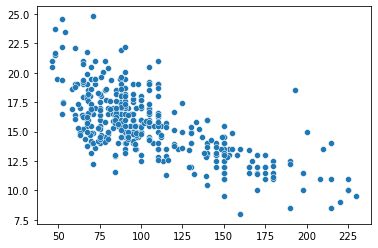

In [12]:
horse=np.array(mpg_df.horsepower)
acc=np.array(mpg_df.acceleration)
sns.scatterplot(horse,acc)


### Step 6. Generate subplots to display the histograms for acceleration, displacement and weight and kilometer_per_litre. Note down your insight for the same

Text(0.5, 1.0, 'Miles Per Gallon')

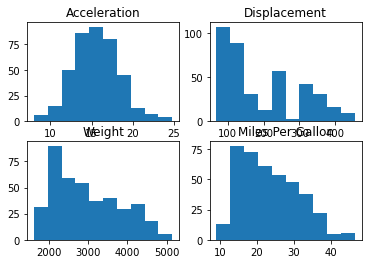

In [13]:
plt.subplot(2,2,1)
plt.hist(mpg_df['acceleration'])
plt.title('Acceleration')
plt.subplot(2,2,2)
plt.hist(mpg_df['displacement'])
plt.title('Displacement')
plt.subplot(2,2,3)
plt.hist(mpg_df['weight'])
plt.title('Weight')
plt.subplot(2,2,4)
plt.hist(mpg_df['mpg'])
plt.title('Miles Per Gallon')

### Step 7. Create a plot to check the relationship between displacement and weight for origin 2, color the datapoints based on no of cylinders. Note down your insight for the same and save the plot as an image file. 

<AxesSubplot:xlabel='cylinders', ylabel='displacement'>

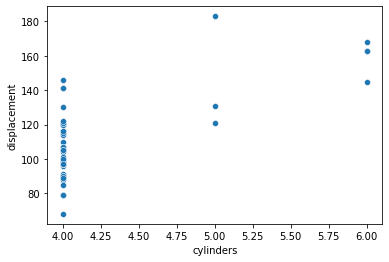

In [14]:
df=mpg_df[mpg_df.origin==2]
sns.scatterplot(data=df,x='cylinders',y='displacement')

### Step 8. Display the frequency distribution of the Origin variable. Note down your insight for the same

<AxesSubplot:xlabel='origin', ylabel='count'>

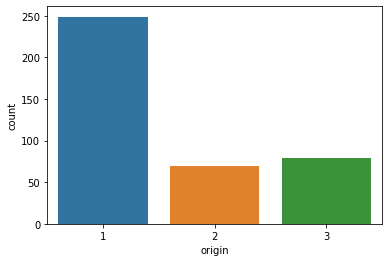

In [15]:
sns.countplot(x='origin', data=mpg_df)

### Step 9. Check the relationship of multiple variables wrt kilometer_per_litre. Note down your insight for the same

<AxesSubplot:xlabel='cylinders', ylabel='mpg'>

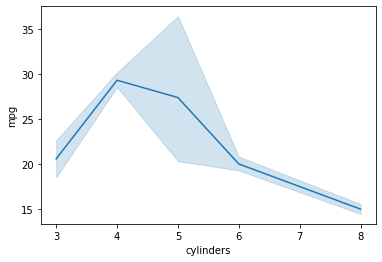

In [16]:
sns.lineplot(x='cylinders',y='mpg',data=mpg_df)

<AxesSubplot:xlabel='displacement', ylabel='mpg'>

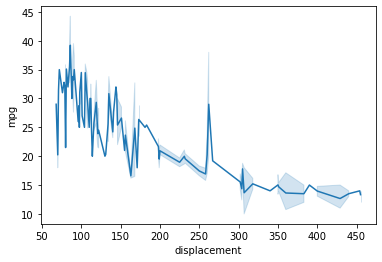

In [17]:
sns.lineplot(x='displacement',y='mpg',data=mpg_df)

<AxesSubplot:xlabel='acceleration', ylabel='mpg'>

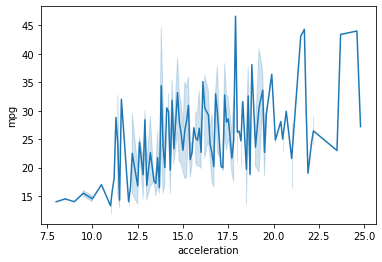

In [18]:
sns.lineplot(x='acceleration',y='mpg',data=mpg_df)

<AxesSubplot:xlabel='mpg', ylabel='horsepower'>

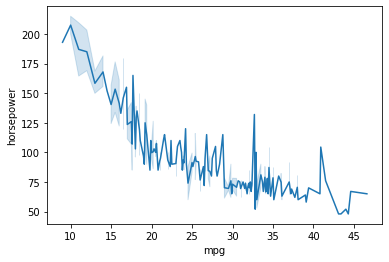

In [19]:
sns.lineplot(x='mpg',y='horsepower',data=mpg_df)

<AxesSubplot:xlabel='weight', ylabel='mpg'>

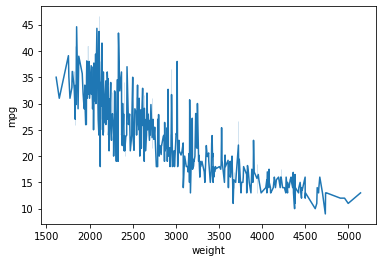

In [20]:
sns.lineplot(x='weight',y='mpg',data=mpg_df)

### Step 10. Display the average weight based on no of cylinders present. Note down the insight for the same

<AxesSubplot:xlabel='cylinders', ylabel='weight'>

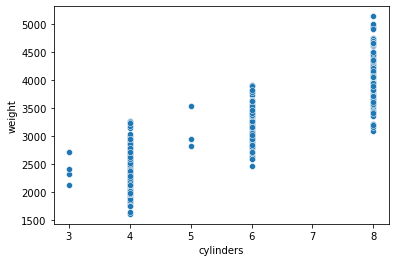

In [21]:
sns.scatterplot(y='weight',x='cylinders',data=mpg_df)

### Step 11. Check for the outliers in the dataset. Note down the insight for the same.

D:\Anaconda\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mpg'>

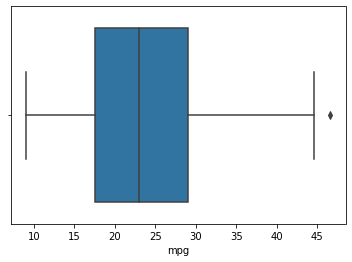

In [22]:
#Checking Ouliers for mpg Column
sns.boxplot(mpg_df['mpg'])

#### Here we can see some outliers we have to treat them

In [23]:
#Finding Outliers 
print(np.where(mpg_df['mpg']>45))

(array([322], dtype=int64),)


In [24]:
#Treating Outlier
mpg_df.iloc[322,0]=mpg_df.mpg.mean()

D:\Anaconda\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mpg'>

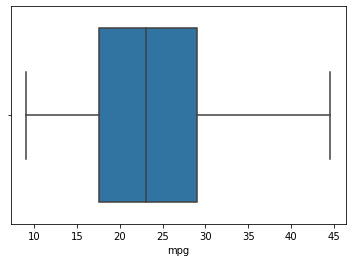

In [25]:
#Confimation of no Ouliers for mpg Column
sns.boxplot(mpg_df['mpg'])

D:\Anaconda\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cylinders'>

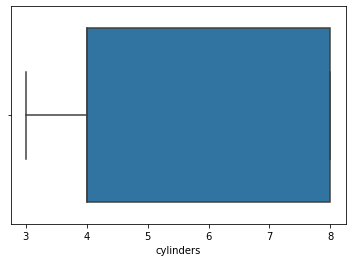

In [26]:
#Checking Ouliers for cylinders Column
sns.boxplot(mpg_df['cylinders'])

D:\Anaconda\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='displacement'>

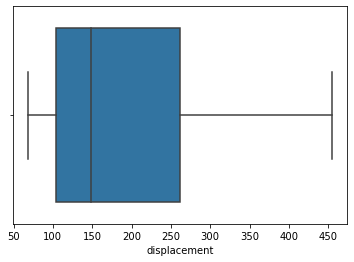

In [27]:
#Checking Ouliers for displacement Column
sns.boxplot(mpg_df['displacement'])

D:\Anaconda\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='horsepower'>

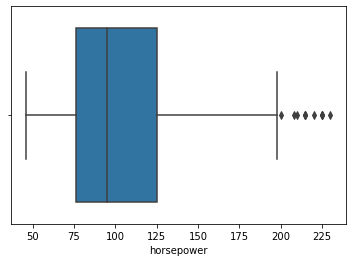

In [28]:
#Checking Ouliers for horsepower Column
sns.boxplot(mpg_df['horsepower'])

#### Here we can see some outliers we have to treat them

In [29]:
#Finding Outliers
x=np.where(mpg_df['horsepower']>200)
print(x)

(array([  6,   7,   8,  13,  25,  27,  67,  94,  95, 116], dtype=int64),)


In [30]:
#Removing Outlier
for y in x:
    mpg_df.iloc[y,3]=mpg_df.horsepower.mean()

D:\Anaconda\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='horsepower'>

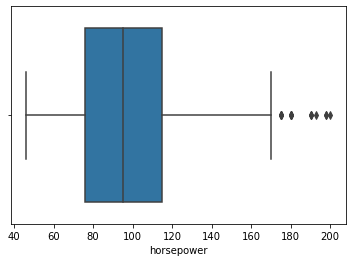

In [31]:
#Conformation of no Ouliers for horsepower Column
sns.boxplot(mpg_df['horsepower'])

D:\Anaconda\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='weight'>

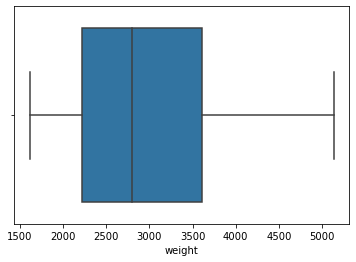

In [32]:
#Checking Ouliers for weight Column
sns.boxplot(mpg_df['weight'])

D:\Anaconda\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='acceleration'>

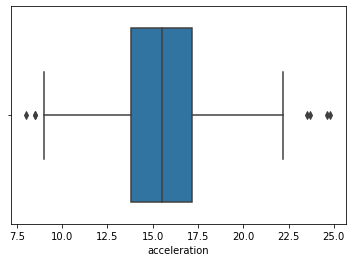

In [33]:
#Checking Ouliers for acceleration Column
sns.boxplot(mpg_df['acceleration'])

#### Here we can see some outliers we have to treat them

In [34]:
#Finding Outliers 
x=np.where(mpg_df['acceleration']>22.1)
y=np.where(mpg_df['acceleration']<8.75)
print(x)
print(y)

(array([ 59, 195, 299, 300, 326, 394], dtype=int64),)
(array([ 7,  9, 11], dtype=int64),)


In [35]:
#Treating Outliers > 22.1
for i in x:
    mpg_df.iloc[i,5]=mpg_df.acceleration.mean()
#Treating Outliers < 8.75
for l in y:
    mpg_df.iloc[l,5]=mpg_df.acceleration.mean()

D:\Anaconda\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='acceleration'>

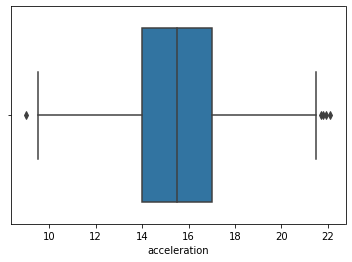

In [36]:
#Verification of No Ouliers for acceleration Column
sns.boxplot(mpg_df['acceleration'])

D:\Anaconda\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='model year'>

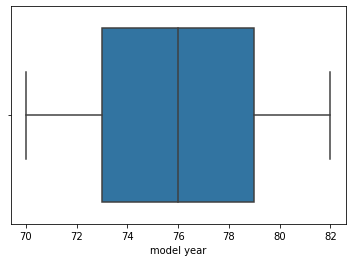

In [37]:
#Checking Ouliers for model year Column
sns.boxplot(mpg_df['model year'])

### Step 12. Plot the correlations for variables.

In [38]:
mpg_df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.777647,-0.805459,-0.764700,-0.833413,0.382214,0.577637,0.556375
cylinders,-0.777647,1.000000,0.950721,0.828658,0.896017,-0.500524,-0.348746,-0.562543
displacement,-0.805459,0.950721,1.000000,0.831408,0.932824,-0.528642,-0.370164,-0.609409
horsepower,-0.764700,0.828658,0.831408,1.000000,0.840069,-0.603597,-0.355919,-0.456275
weight,-0.833413,0.896017,0.932824,0.840069,1.000000,-0.413505,-0.306564,-0.581024
acceleration,0.382214,-0.500524,-0.528642,-0.603597,-0.413505,1.000000,0.255306,0.203055
model year,0.577637,-0.348746,-0.370164,-0.355919,-0.306564,0.255306,1.000000,0.180662
origin,0.556375,-0.562543,-0.609409,-0.456275,-0.581024,0.203055,0.180662,1.000000


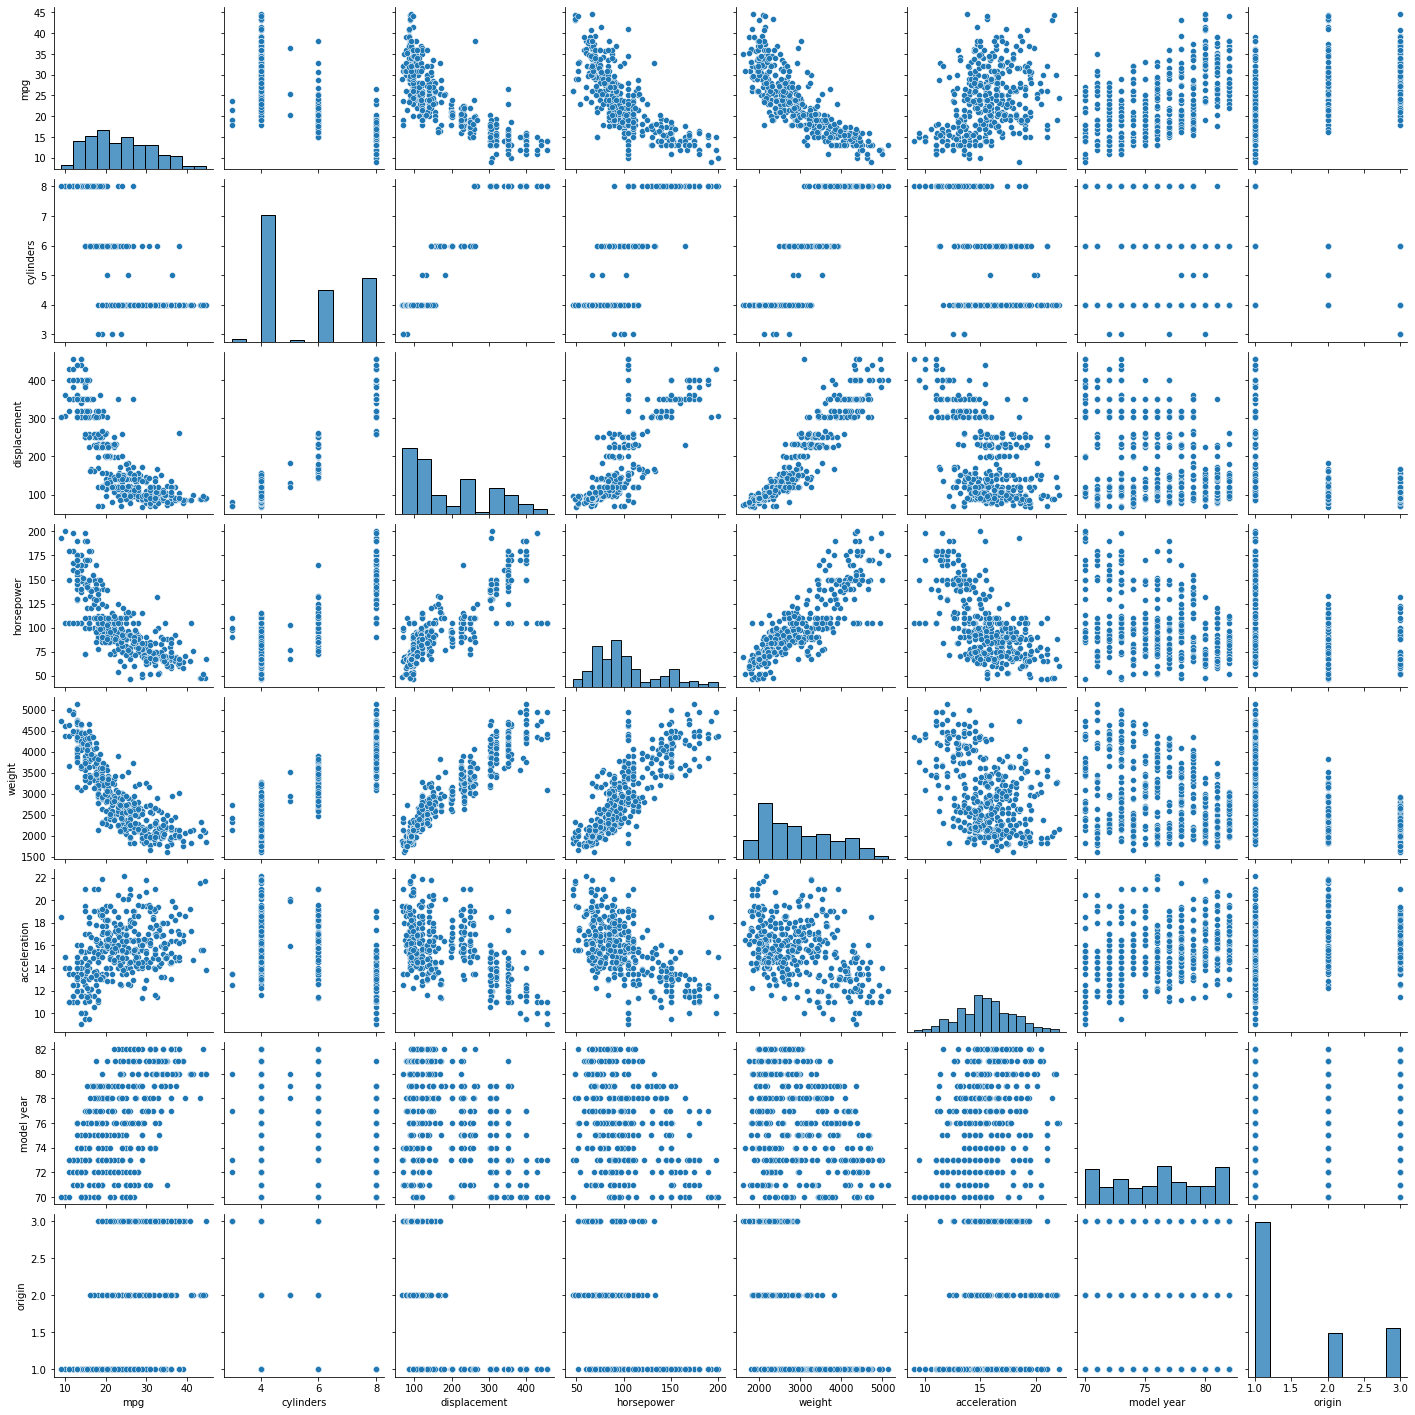

In [39]:
sns.pairplot(mpg_df)